# Data analysis - part 1
### DIY sensor data analysis

In this notebook, we will focus only on the analysis of data obtained from the sensor based on NodeMCU and DHT22. We will start by importing data from a .csv file.

In [2]:
import pandas as pd

In [3]:
# Importing data from previously prepared .csv file

data = pd.read_csv('data/nodemcu_data_final.csv', parse_dates=['date'], dayfirst=False)

In [4]:
data

,date,t_max,t_min,t_mean
0,2021-02-15,1.0,-4.3,-1.611111
1,2021-02-16,1.4,-9.9,-2.673611
2,2021-02-17,9.5,-1.7,1.112676
3,2021-02-18,-1.7,-12.6,-5.995804
4,2021-02-19,1.6,-12.9,-4.474074
...,...,...,...,...
315,2021-12-27,-1.7,-12.3,-6.922378
316,2021-12-28,2.0,-4.7,-0.955556
317,2021-12-29,3.6,0.1,1.690278
318,2021-12-30,6.6,2.4,4.747222


In [7]:
# Checking data types in the dataframe

data.dtypes

date      datetime64[ns]
t_max            float64
t_min            float64
t_mean           float64
dtype: object

Let's check the basic statistics data from the measurements. It should be taken into account that the data set does not include data for the first 44 winter days of the year (from *15-02-2021* to *31-12-2021*)

In [13]:
data.describe()

,t_max,t_min,t_mean
count,313.000000,313.000000,313.000000
mean,16.397125,6.840256,11.340449
std,9.149605,6.877307,7.657188
min,-2.200000,-12.900000,-6.922378
25%,8.700000,1.400000,5.174306
50%,16.800000,7.300000,11.456944
75%,24.400000,11.900000,17.627778
max,34.300000,20.500000,26.523611


Let's create a histogram with the mean temperature distribution in 2021.

<AxesSubplot:>

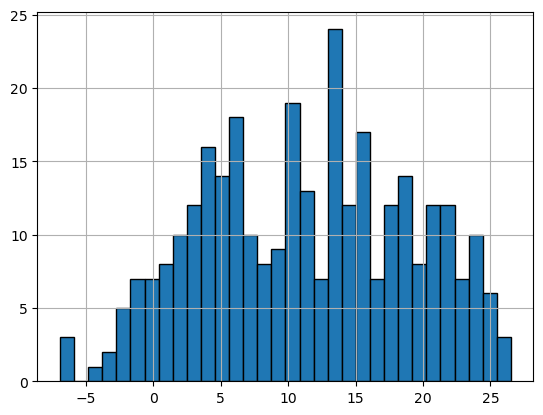

In [11]:
data['t_mean'].hist(bins=32, edgecolor='k')

The most frequent values of the mean temperature are close to the mean temperature for the whole year, and the least frequent at the extreme points of the range. However, the rest of the distribution is quite irregular, which may indicate large fluctuations in the mean temperature during the year.

The next step will be to check what the maximum and minimum temperatures were?

In [25]:
# Maximum temperature

data[data['t_max'] == data['t_max'].max()]

,date,t_max,t_min,t_mean
127,2021-06-22,34.3,18.2,24.889583


In [26]:
# Minimum temperature

data[data['t_min'] == data['t_min'].min()]

,date,t_max,t_min,t_mean
4,2021-02-19,1.6,-12.9,-4.474074


The best way to show how the mean temperature changes over the year is to create an ordinary line chart.

<AxesSubplot:title={'center':'Mean temperature in 2021'}, xlabel='date', ylabel='mean temperature [*C]'>

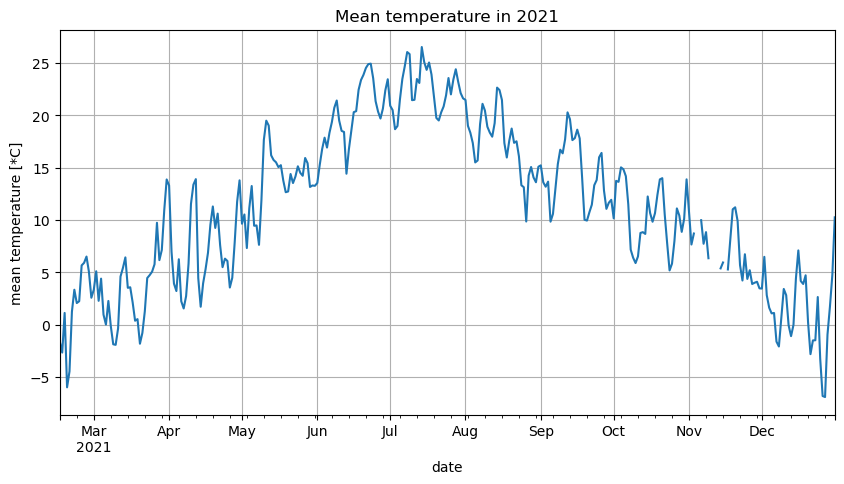

In [17]:
data.plot(x='date', y='t_mean', xlabel='date', ylabel='mean temperature [*C]', 
        title='Mean temperature in 2021', figsize=(10,5), grid=True, legend=False)

As could be expected from previous observations, the plot forms an irregular jagged line, because according to the climate in Poland, relatively frequent weather changes are characteristic.

To see the changes in the mean temperature throughout the year in a slightly lower resolution, we can check how the mean temperature changes in each month.

<AxesSubplot:title={'center':'Mean temperature in each month of 2021'}, xlabel='month', ylabel='mean temperature [*C]'>

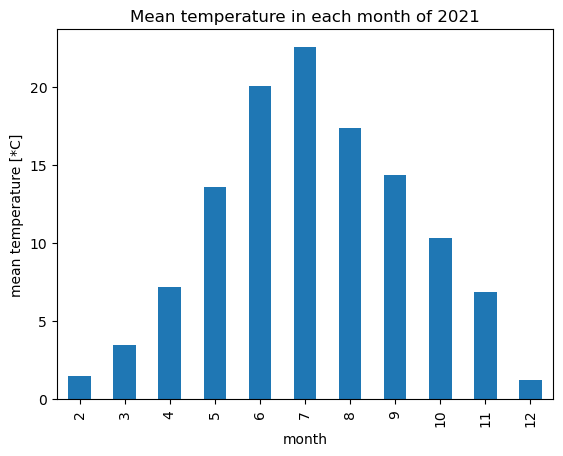

In [46]:
data.groupby([data['date'].dt.month])['t_mean'].agg('mean').plot.bar(xlabel='month', 
    ylabel='mean temperature [*C]', title='Mean temperature in each month of 2021')

In [47]:
# Dataframe with mean temperature, max and min temperature for each month

pd.concat([data.groupby([data['date'].dt.month])[['t_mean']].agg('mean'),data.groupby([data['date'].dt.month])['t_min'].min(),data.groupby([data['date'].dt.month])['t_max'].max()], axis=1)

,t_mean,t_min,t_max
date,,,
2,1.490659,-12.9,13.6
3,3.449835,-7.0,21.1
4,7.149486,-2.7,22.0
5,13.554327,0.7,27.0
6,20.078364,5.1,34.3
7,22.561440,13.0,33.8
8,17.351447,8.6,31.2
9,14.334527,3.0,28.2
10,10.340591,0.2,21.0


A simple bar chart only shows the average temperature value for each month. To show the mean, maximum, minimum temperature with its distribution on one chart, we can create the so-called violin plot. Thanks to this, we can easily compare how the temperature has changed in individual months.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

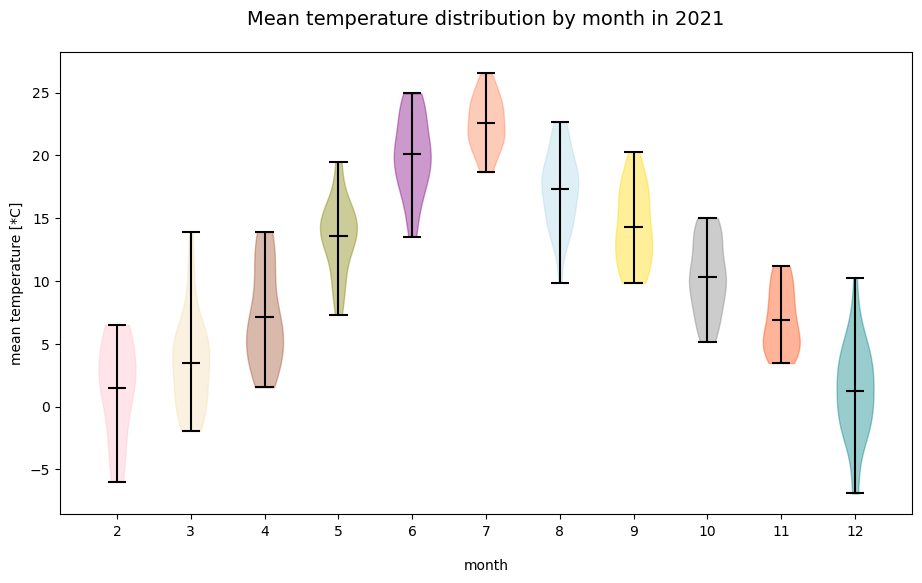

In [20]:
# Creating a list of Series for each month
v=[]
for i in range(2,13):
    v.append(data.loc[data['date'].dt.month == i]['t_mean'].dropna())

fig, ax = plt.subplots(figsize=(11, 6))

# List of y axis labels
labels = range(2,13)

# List of violin plot colors
colors = ['pink', 'wheat', 'sienna', 'olive', 'purple', 'coral', 'lightblue', 'gold', 'grey', 'orangered', 'teal']

# Setting labels on an 'x' axis
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)

# Creating a violin plot 
violins = ax.violinplot(v, showmeans=True)

# Changing colors of violin plots (different for each month)
for i, violin in enumerate(violins['bodies']):
    violin.set_color(colors[i])
    violin.set_alpha(0.4)
     
# Changing color of cbars to black
for i in ['cbars','cmeans','cmins','cmaxes']:
    violins[i].set_color('black')

ax.set_xlabel('month', labelpad=15)
ax.set_ylabel('mean temperature [*C]')
ax.set_title('Mean temperature distribution by month in 2021', fontsize=14, pad=20)

plt.show()

Some observations from the violin plot:
- In July and November, the smallest temperature fluctuations occurred.
- The greatest differences in the maximum and minimum mean temperatures occurred in March and December.
- The anomaly of temperature distribution in December is caused by high temperatures (10* C) on New Year's Eve.
- The difference between the maximum and minimum temperature in March is more than 15 degrees. In addition, this month you could experience every climatic season of the year.

### How long each season lasted?

Poland is situated in a moderate climate zone with four main seasons (spring, summer, fall, winter) and some distinguish two additional seasons, described as early spring and early winter. 

Here are the temperature ranges for each season:
- early spring: 0 - 5 *C  
- spring: 5 - 15 *C  
- summer: > 15 *C 
- fall: 5 - 15 *C  
- early winter: 0 - 5 *C  
- winter: < 0 *C  

Let's check:
- How many days did each season last?
- When was the first and last day of occurrence of the temperature characteristic for a given season?

In [45]:
early_spring = data.loc[(data['t_mean'] >= 0) & (data['t_mean'] < 5) & (data['date'] < '2021-06-30')]
spring = data.loc[(data['t_mean'] >= 5) & (data['t_mean'] < 15) & (data['date'] < '2021-06-30')]
summer = data.loc[data['t_mean'] > 15]
fall =  data.loc[(data['t_mean'] <= 15) & (data['t_mean'] < 15) & (data['date'] > '2021-06-30')]
early_winter = data.loc[(data['t_mean'] >= 0) & (data['t_mean'] < 5) & (data['date'] > '2021-06-30')]
winter = data.loc[(data['t_mean'] < 0) & (data['date'] > '2021-06-30')]

pd.DataFrame({'season':['early spring','spring','summer','fall','early winter','winter'], 
            'days': [early_spring['t_mean'].count(),
            spring['t_mean'].count(),
            summer['t_mean'].count(),
            fall['t_mean'].count(),
            early_winter['t_mean'].count(),
            winter['t_mean'].count()
            ],
            'first_day': [early_spring['date'].head(1).to_string(index=False),
            spring['date'].head(1).to_string(index=False),
            summer['date'].head(1).to_string(index=False),
            fall['date'].head(1).to_string(index=False),
            early_winter['date'].head(1).to_string(index=False),
            winter['date'].head(1).to_string(index=False)
            ],
            'last_day': [early_spring['date'].tail(1).to_string(index=False),
            spring['date'].tail(1).to_string(index=False),
            summer['date'].tail(1).to_string(index=False),
            fall['date'].tail(1).to_string(index=False),
            early_winter['date'].tail(1).to_string(index=False),
            winter['date'].tail(1).to_string(index=False)
            ]
            })

,season,days,first_day,last_day
0,early spring,30,2021-02-17,2021-04-27
1,spring,56,2021-02-24,2021-06-13
2,summer,109,2021-05-10,2021-10-04
3,fall,107,2021-08-24,2021-12-31
4,early winter,22,2021-11-23,2021-12-30
5,winter,12,2021-12-07,2021-12-28


Let's plot the data from table above in more readable way. We will create a bar chart for the average temperature of each day. In addition, each bar will have a color corresponding to a specific time of year. This will make it much easier to see the distribution and start/end date of each season.

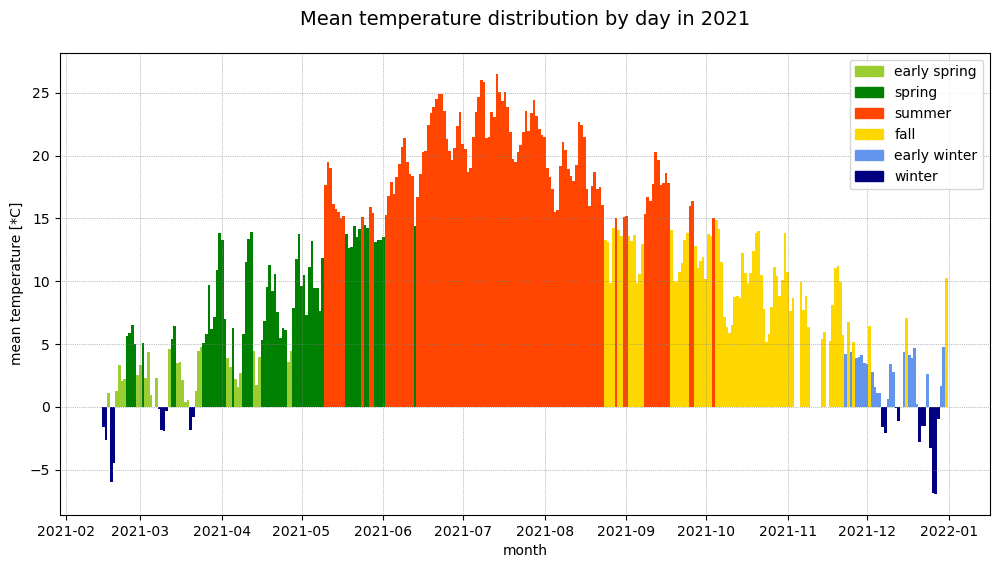

In [124]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12,6))

x = data['date']
y = data['t_mean']

# Creating a list of colors representing each season depending of mean temperature and date
colors = []

for i,value in enumerate(y):
    if (value >= 5) and (value < 15) and (x[i] > pd.Timestamp('2021-06-30')):
        colors.append('gold')
    elif (value > 15):
        colors.append('orangered')
    elif (value < 0):
        colors.append('navy')
    elif (value >= 5) and (value < 15) and (x[i] < pd.Timestamp('2021-06-30')):
        colors.append('green')
    elif (value >= 0) and (value < 5) and (x[i] < pd.Timestamp('2021-06-30')):
        colors.append('yellowgreen')
    else:
        colors.append('cornflowerblue')
   
# Creating a barplot with colors corresponding to each season
ax.bar(x, y, width=1, color=colors)

# Creating a grid
ax.grid(ls= ':', color='grey', lw=0.5);

# Setting chart labels and title
ax.set_title('Mean temperature distribution by day in 2021', fontsize=14, pad=20)
ax.set_xlabel('month')
ax.set_ylabel('mean temperature [*C]')

# Adding legend with colors corresponding to each season
early_spring = mpatches.Patch(color='yellowgreen', label='early spring')
spring = mpatches.Patch(color='green', label='spring')
summer = mpatches.Patch(color='orangered', label='summer')
fall = mpatches.Patch(color='gold', label='fall')
early_winter = mpatches.Patch(color='cornflowerblue', label='early winter')
winter = mpatches.Patch(color='navy', label='winter')

plt.legend(handles=[early_spring,spring,summer,fall,early_winter,winter])

plt.show()

Some observations from the chart above:
- The longest climatic seasons of the year were summer and autumn (109 and 107 days respectively).
- Summer was the season of the year with the greatest range. The first summer days appeared in early May, and the last in early October. From early June to mid-August there was a continuous summer (without a single day in June).
- The first days with fall temperatures appeared early at the turn of August and September.
- This year there was also a continuous climatic autumn with temperatures characteristic of this period from late September to mid-November.